## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
df = pd.read_csv('Twitter Sentiments.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
df.isnull().sum() # No missing data

id       0
label    0
tweet    0
dtype: int64

In [6]:
# Dropping the 'id' column
df = df.drop(['id'], axis =1)

In [7]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


## Exploratory Data Analysis

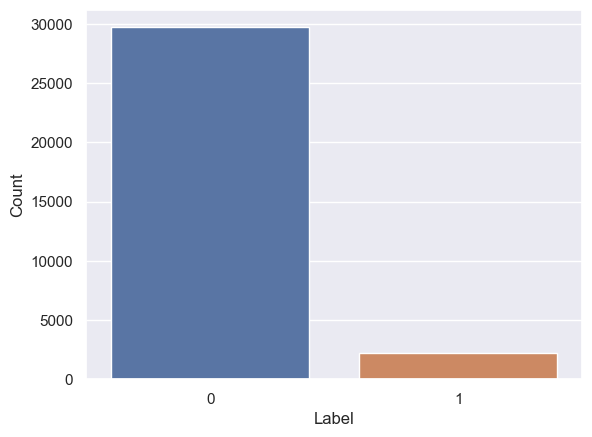

In [8]:
# Visualizing the distribution of labels
sns.set(style="darkgrid")

# Create a DataFrame with the counts of each class
count_df = df['label'].value_counts().reset_index()
count_df.columns = ['Label', 'Count']

# Plot the grouped bar chart
sns.barplot(x='Label', y='Count', data=count_df)

plt.show()

In [9]:
label_types = df['label'].value_counts()
label_types

0    29720
1     2242
Name: label, dtype: int64

In [10]:
# Knowing the length of tweets
df['length'] = df['tweet'].apply(len)
df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


Text(0.5, 0, 'Length')

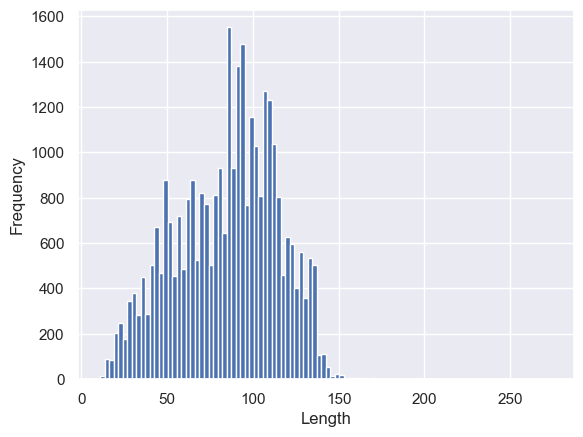

In [11]:
df['length'].plot(bins=100, kind = 'hist')
plt.xlabel('Length')

In [12]:
df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [13]:
# Tweet having the shortest length
df[df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [14]:
# Tweet with average length
df[df['length'] == 85]['tweet'].iloc[0]

' â\x86\x9d #under the spell of brexit referendum - commerzbank   #blog #silver #gold #forex'

In [15]:
# Positive tweets
positive = df[df['label'] == 0]
positive.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [16]:
# Negative tweets
negative = df[df['label'] == 1]
negative.head()

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104


In [17]:
# Extraction of hashtags
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [18]:
# Extraction of hashtags from non-racist/non-sexist tweets
hashtag_positive = hashtag_extract(df['tweet'][df['label']==0])

# Extraction of hashtags from racist/sexist tweets
hashtag_negative = hashtag_extract(df['tweet'][df['label']==1])

In [19]:
hashtag_positive[:5]

[['run'], ['lyft', 'disapointed', 'getthanked'], [], ['model'], ['motivation']]

In [20]:
#Unnest the list
hashtag_positive = sum(hashtag_positive,[])
hashtag_negative = sum(hashtag_negative,[])

In [21]:
hashtag_positive[:10]

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate']

In [22]:
hashtag_negative[:10]

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump']

In [23]:
freq = nltk.FreqDist(hashtag_positive)
d = pd.DataFrame({'Hashtag':list(freq.keys()),
                 'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,run,33
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,364


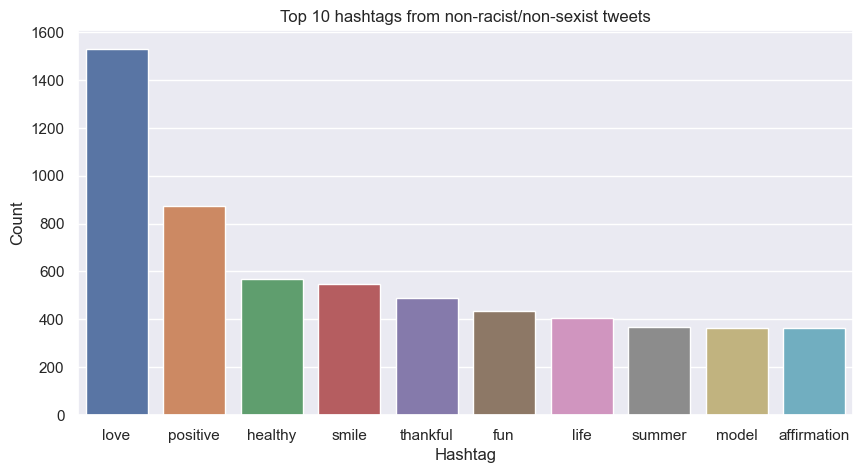

In [24]:
# Selecting top 10 hashtags from non-racist/non-sexist tweets
d = d.nlargest(columns = 'Count', n =10)
plt.figure(figsize =(10,5))
sns.barplot(data = d , x='Hashtag', y = 'Count')
plt.title('Top 10 hashtags from non-racist/non-sexist tweets')
plt.show()

In [25]:
freq = nltk.FreqDist(hashtag_negative)
d = pd.DataFrame({'Hashtag':list(freq.keys()),
                 'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


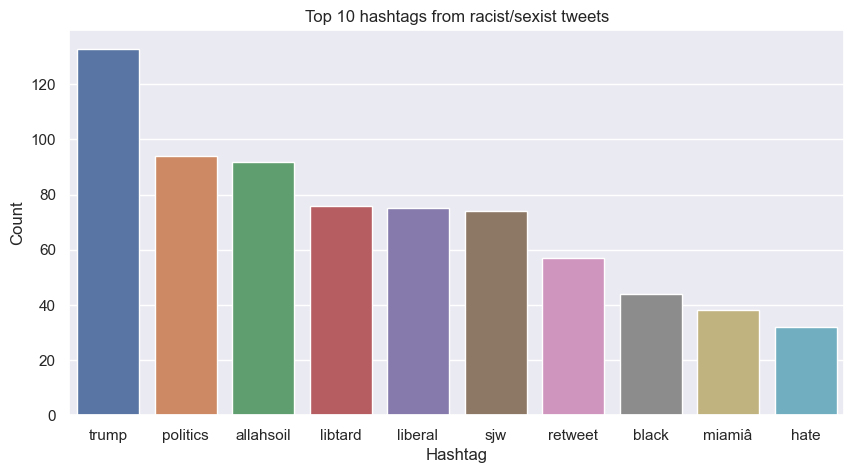

In [26]:
# Selecting top 10 hashtags from non-racist/non-sexist tweets
d = d.nlargest(columns = 'Count', n =10)
plt.figure(figsize =(10,5))
sns.barplot(data = d , x='Hashtag', y = 'Count')
plt.title('Top 10 hashtags from racist/sexist tweets')
plt.show()

## Data Cleaning

In [27]:
# Removing pattern in the input text
def remove_pattern(txt, pattern):
    r = re.findall(pattern, txt)
    for word in r:
        txt = re.sub(word, "", txt)
    return txt

In [28]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [29]:
df.head()

,label,tweet,length,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,122,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,21,bihday your majesty
3,0,#model i love u take with u all the time in ...,86,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,39,factsguide: society now #motivation


In [30]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

In [31]:
df.head()

,label,tweet,length,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,122,thanks for #lyft credit i can t use cause th...
2,0,bihday your majesty,21,bihday your majesty
3,0,#model i love u take with u all the time in ...,86,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,39,factsguide society now #motivation


In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vishnuvardhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# Removing stop words
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([word.lower() for word in x.split() if word.lower() not in stop_words]))

In [34]:
df.head(10)

,label,tweet,length,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,father dysfunctional selfish drags kids dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,122,thanks #lyft credit use cause offer wheelchair...
2,0,bihday your majesty,21,bihday majesty
3,0,#model i love u take with u all the time in ...,86,#model love u take u time ur
4,0,factsguide: society now #motivation,39,factsguide society #motivation
5,0,[2/2] huge fan fare and big talking before the...,116,huge fan fare big talking leave chaos pay disp...
6,0,@user camping tomorrow @user @user @user @use...,74,camping tomorrow danny
7,0,the next school year is the year for exams.ð...,143,next school year year exams think #school #exa...
8,0,we won!!! love the land!!! #allin #cavs #champ...,87,love land #allin #cavs #champions #cleveland #...
9,0,@user @user welcome here ! i'm it's so #gr...,50,welcome #gr


## Tokenization and Stemming

In [35]:
#Tokenization
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, use, cause, offer, whe...
2                                    [bihday, majesty]
3                 [#model, love, u, take, u, time, ur]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [36]:
# Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence : [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, #lyft, credit, use, caus, offer, wheel...
2                                    [bihday, majesti]
3                 [#model, love, u, take, u, time, ur]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [37]:
# Joining the stem words into a sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

In [38]:
df['clean_tweet'] = tokenized_tweet
df.head()

,label,tweet,length,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,father dysfunct selfish drag kid dysfunct #run
1,0,@user @user thanks for #lyft credit i can't us...,122,thank #lyft credit use caus offer wheelchair v...
2,0,bihday your majesty,21,bihday majesti
3,0,#model i love u take with u all the time in ...,86,#model love u take u time ur
4,0,factsguide: society now #motivation,39,factsguid societi #motiv


## Word Cloud Visualization

In [39]:
#!pip install wordcloud

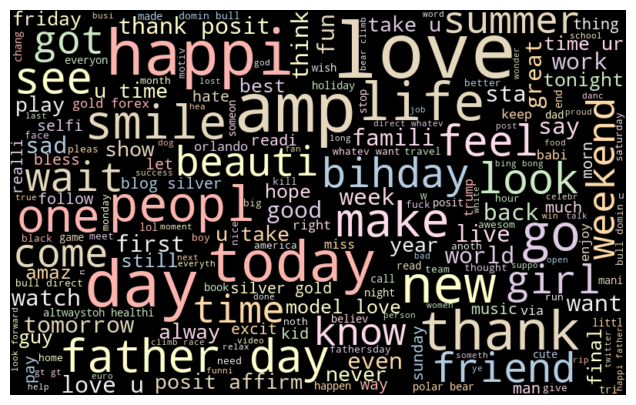

In [40]:
# Visualization of frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100,colormap='Pastel1').generate(all_words)

# plot the graph
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

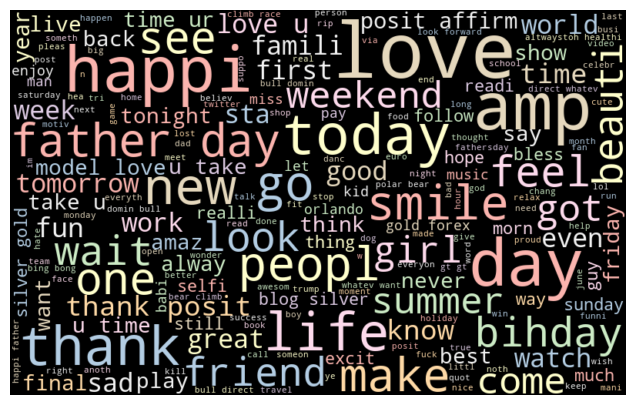

In [41]:
# Visualization of frequent words in +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100, colormap='Pastel1').generate(all_words)

# plot the graph
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

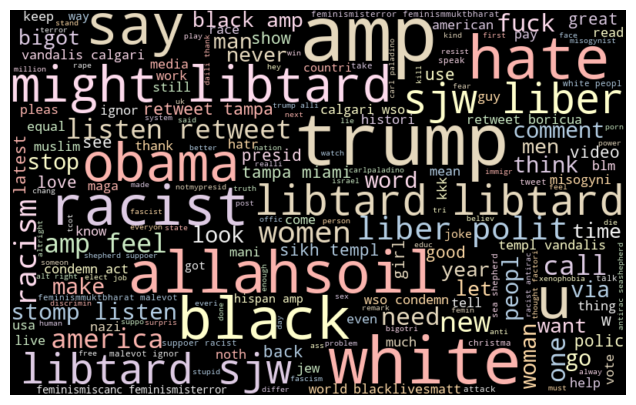

In [42]:
# Visualization of frequent words in -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100,colormap='Pastel1').generate(all_words)

# plot the graph
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Creating the Bag Of Words Model

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bow =  CountVectorizer(dtype = 'uint8').fit_transform(df['clean_tweet'])

In [44]:
bow

<31962x31615 sparse matrix of type '<class 'numpy.uint8'>'
	with 234266 stored elements in Compressed Sparse Row format>

In [45]:
bow[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Splitting the dataset into the Training set and Test set

In [46]:
# Stratified train-test split
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test = train_test_split( bow, df['label'], test_size = 0.2 , random_state = 42, stratify = df['label'])

## Model Training and Evaluation

In [47]:
# Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score, precision_score, recall_score

classifier = RandomForestClassifier(n_estimators = 100 , criterion = 'gini', random_state = 42, n_jobs = -1)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

<Axes: >

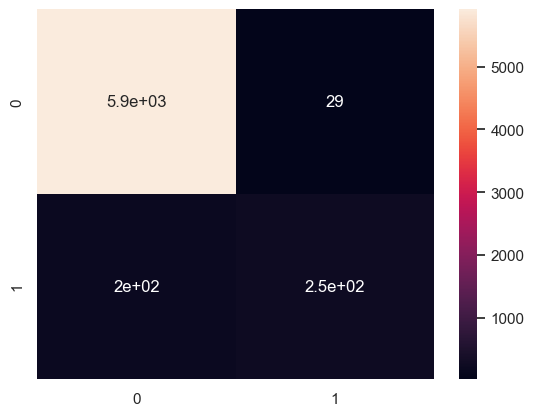

In [48]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [49]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Round the scores to two decimal places
accuracy = round(accuracy, 2)
precision = round(precision, 2)
recall = round(recall, 2)
f1 = round(f1, 2)

# Create a pandas DataFrame with the metric names and scores
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Score': [accuracy, precision, recall, f1]
}
score = pd.DataFrame(data)

In [50]:
heading = 'Evaluation Metrics(before updating the threshold)'
print(heading)
score

Evaluation Metrics(before updating the threshold)


,Metric,Score
0,Accuracy,0.96
1,Precision,0.89
2,Recall,0.55
3,F1-score,0.68


In [51]:
# Threshold moving
pred_prob = classifier.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.35
pred = pred.astype(np.int_)

In [52]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

accuracy = round(accuracy, 2)
precision = round(precision, 2)
recall = round(recall, 2)
f1 = round(f1, 2)

data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Score': [accuracy, precision, recall, f1]
}
score = pd.DataFrame(data)

In [53]:
heading = 'Evaluation Metrics(after updating the threshold)'
print(heading) 
score

Evaluation Metrics(after updating the threshold)


,Metric,Score
0,Accuracy,0.96
1,Precision,0.80
2,Recall,0.66
3,F1-score,0.72


In [54]:
# K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5, n_jobs = -1)

print('K-fold Cross Validation')

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

K-fold Cross Validation
Accuracy: 96.14 %
Standard Deviation: 0.12 %
